## Testes e IC 1 - Respondendo a pergunta 1(influência do gênero)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_with_one_hot = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

df_with_genre_list = pd.read_csv('../dataset/songs_with_genre.csv',
                 encoding='iso-8859-1', na_values='unknown')

relevant_genres = pd.read_csv('../dataset/genres_relevant.csv',
                 encoding='iso-8859-1', na_values='unknown')

In [4]:
df_with_genre_list['mode']

0       1.0
1       0.0
2       1.0
3       0.0
4       1.0
5       1.0
6       0.0
7       1.0
8       0.0
9       0.0
10      0.0
11      1.0
12      1.0
13      0.0
14      0.0
15      1.0
16      0.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      0.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      0.0
       ... 
6980    1.0
6981    0.0
6982    0.0
6983    1.0
6984    1.0
6985    0.0
6986    1.0
6987    1.0
6988    1.0
6989    1.0
6990    1.0
6991    1.0
6992    0.0
6993    0.0
6994    1.0
6995    0.0
6996    1.0
6997    1.0
6998    1.0
6999    0.0
7000    1.0
7001    1.0
7002    0.0
7003    1.0
7004    0.0
7005    1.0
7006    0.0
7007    1.0
7008    1.0
7009    1.0
Name: mode, Length: 7010, dtype: float64

In [4]:
#agrupa por gênero para tirar estatísticas
def group_by_genre(relevant_genres, df_genre_rank):    
    genre_stats = {}
    for i in range(relevant_genres.shape[0]):
        genres = relevant_genres.iloc[i]['genre']
        df_genres = df_genre_rank[['peak_pos', 'weeks', 'rank', genres]]
        group_genre = df_genres[df_genres[genres] == 1]
        group_genre = group_genre.mean()[['peak_pos', 'weeks', 'rank']]
        
        genre_stats[genres] = group_genre

    return pd.DataFrame.from_dict(genre_stats, orient='index')

In [5]:
genre_stats = group_by_genre(relevant_genres, df_with_one_hot)
genre_stats

,peak_pos,weeks,rank
contemporary country,50.299505,15.967822,82.117987
country,49.975221,16.169912,82.679646
country road,50.584699,16.113843,82.539162
dance pop,40.780886,14.259518,72.769619
hip hop,46.874513,12.737334,77.037412
hip pop,40.401075,16.301075,75.610753
pop,43.577250,13.594567,72.752801
pop rap,44.524171,14.124171,75.250237
post-teen pop,42.266711,12.546123,71.719920
r&b,39.548160,16.174628,74.144871


In [6]:
def bootstrap(df, n = 10000):
    size = len(df)
    values = []
    
    for i in range(n):
        sample = df_with_one_hot.sample(size, replace=True)
        values.append(group_by_genre(relevant_genres, sample)['peak_pos'])
    return values

In [7]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [8]:
bootstrap_result = pd.DataFrame(bootstrap(df_with_one_hot ,1000))
bootstrap_result

,contemporary country,country,country road,dance pop,hip hop,hip pop,pop,pop rap,post-teen pop,r&b,rap,southern hip hop,trap music,urban contemporary
peak_pos,50.061821,50.059140,50.668825,39.455430,46.571643,39.281026,42.887844,43.914711,41.430311,38.128517,47.641622,47.245017,53.628178,37.950772
peak_pos,49.316097,49.074173,49.887375,41.333076,45.806854,40.965553,43.956252,43.842430,42.221639,40.290053,46.828555,48.910420,52.676149,40.848456
peak_pos,50.585842,50.071809,50.943882,40.515048,46.055735,40.610874,43.506250,44.563931,42.846932,39.292590,47.071471,47.604416,52.593333,39.580116
peak_pos,51.361558,50.934186,51.640741,40.915156,47.529458,41.016251,43.856417,45.284828,42.908795,39.278383,48.191943,49.684734,53.337793,39.859922
peak_pos,50.871774,50.375671,51.044913,39.736759,46.455963,41.417040,42.855380,44.103103,41.408163,39.551891,46.947491,49.423773,51.620616,40.165460
peak_pos,50.656728,50.307956,51.035273,40.246326,48.248056,40.551876,43.290934,44.783223,41.365937,39.072522,48.713291,48.667258,53.771277,38.758586
peak_pos,50.954136,50.778169,51.033728,40.940151,48.079968,40.240781,44.034577,45.726500,41.909825,38.417732,49.111625,49.539462,54.195697,38.456566
peak_pos,49.288727,49.092334,49.786164,41.029607,47.501086,40.991228,43.445436,45.766910,42.019009,41.022820,47.672668,49.600862,52.603484,41.217213
peak_pos,50.133943,49.829825,50.422060,40.723684,47.943038,41.794979,43.526049,45.356832,41.784718,40.470817,48.106495,49.513345,51.821508,40.929064
peak_pos,50.887072,50.855072,51.135683,40.385808,47.765111,39.541020,43.737762,44.867487,41.742138,38.764315,48.666090,49.898438,53.866397,39.084200


In [9]:
bootstrap_result = bootstrap_result.reindex(bootstrap_result.mean().sort_values().index, axis=1)

In [10]:
result_copy = bootstrap_result.copy()
averages = result_copy.mean()
averages_sorted = averages.sort_values()

In [11]:
real_peak_pos = {"a" : 40}
keys = averages_sorted.keys()
for i in range(len(averages_sorted)):
    for j in genre_stats.index:
        if j == keys[i]:
            real_peak_pos[keys[i]] = genre_stats.get_value(j, col='peak_pos')

real_peak_pos = pd.Series(real_peak_pos)
real_peak_pos

C:\Users\Juliana\IBRAHIM\Development\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


a                       40.000000
r&b                     39.548160
urban contemporary      39.831349
hip pop                 40.401075
dance pop               40.780886
post-teen pop           42.266711
pop                     43.577250
pop rap                 44.524171
hip hop                 46.874513
rap                     47.384348
southern hip hop        48.575972
country                 49.975221
contemporary country    50.299505
country road            50.584699
trap music              52.410423
dtype: float64

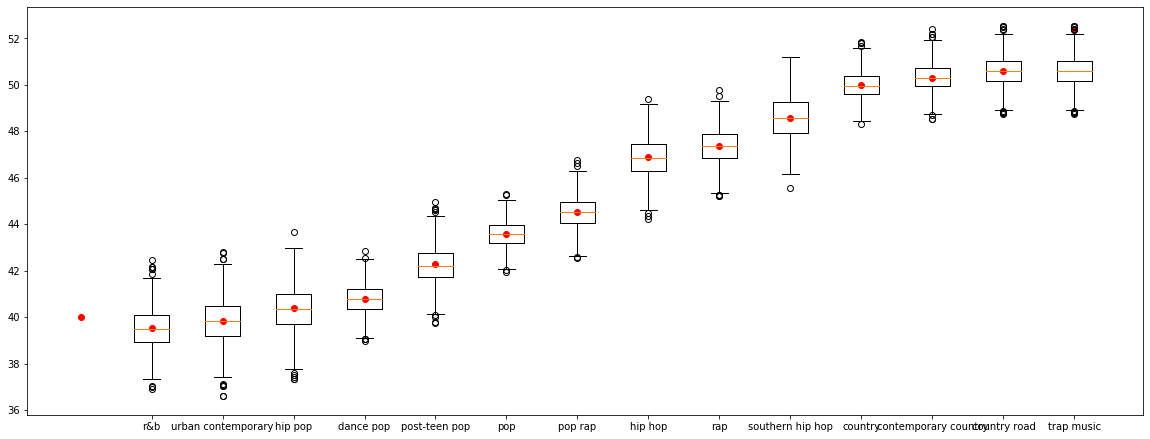

In [12]:
cols = bootstrap_result.columns

plt.figure(figsize=(20,7.5))
plt.boxplot([bootstrap_result[cols[0]], bootstrap_result[cols[1]], bootstrap_result[cols[2]],
            bootstrap_result[cols[3]], bootstrap_result[cols[4]], bootstrap_result[cols[5]],
            bootstrap_result[cols[6]], bootstrap_result[cols[7]], bootstrap_result[cols[8]],
            bootstrap_result[cols[9]], bootstrap_result[cols[10]], bootstrap_result[cols[11]],
            bootstrap_result[cols[12]], bootstrap_result[cols[12]]], 
           labels=cols)
plt.scatter(y=real_peak_pos.values, x=real_peak_pos.keys(), color='red')
plt.show()



In [13]:
bootstrap_top5 = bootstrap_result.loc[:, real_peak_pos.index[1:6]]
bootstrap_bottom5 = bootstrap_result.loc[:, real_peak_pos.index[-5:]]
bootstrap_top5

,r&b,urban contemporary,hip pop,dance pop,post-teen pop
peak_pos,38.128517,37.950772,39.281026,39.455430,41.430311
peak_pos,40.290053,40.848456,40.965553,41.333076,42.221639
peak_pos,39.292590,39.580116,40.610874,40.515048,42.846932
peak_pos,39.278383,39.859922,41.016251,40.915156,42.908795
peak_pos,39.551891,40.165460,41.417040,39.736759,41.408163
peak_pos,39.072522,38.758586,40.551876,40.246326,41.365937
peak_pos,38.417732,38.456566,40.240781,40.940151,41.909825
peak_pos,41.022820,41.217213,40.991228,41.029607,42.019009
peak_pos,40.470817,40.929064,41.794979,40.723684,41.784718
peak_pos,38.764315,39.084200,39.541020,40.385808,41.742138


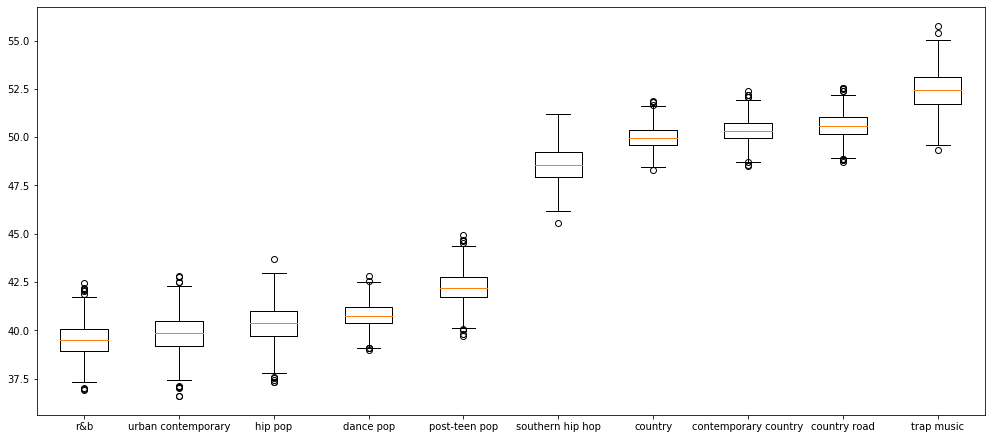

In [15]:
top5cols = bootstrap_top5.columns
bottom5cols = bootstrap_bottom5.columns
plt.figure(figsize=(17, 7.5))
plt.boxplot([bootstrap_top5[top5cols[0]], bootstrap_top5[top5cols[1]], 
             bootstrap_top5[top5cols[2]], bootstrap_top5[top5cols[3]], bootstrap_top5[top5cols[4]], 
            bootstrap_bottom5[bottom5cols[0]], bootstrap_bottom5[bottom5cols[1]], 
             bootstrap_bottom5[bottom5cols[2]], bootstrap_bottom5[bottom5cols[3]], bootstrap_bottom5[bottom5cols[4]]], 
            labels=[top5cols[0], top5cols[1], top5cols[2], top5cols[3], top5cols[4],
                    bottom5cols[0], bottom5cols[1], bottom5cols[2], bottom5cols[3], bottom5cols[4]])

plt.show()

Olhando os resultados encontrados no boxplot a partir do bootstrap, percebemos que todas as médias estão no IC encontrado, logo não é possível rejeitar a hipótese nula. Ou seja, não é possível concluir que o gênero, por si só, impacta o potencial da música no top 100 da billboard.<br>

Contudo, olhando o segundo boxplot, que compara os cinco gêneros com maior média no peak_pos e os cinco gêneros com menor média no peak_pos, percebemos que os ICs não se cruzam, e, portanto, o fator gênero possui importância para determinar o quão alto a música vai no top 100, indicando que alguns gêneros(no exemplo, r&b, urban contemporary, dance pop, hip pop e post-teen pop, que tiveram as melhores médias da base) têm uma chance maior de alcançar posições mais altas.